# K-Means Clustering Notebook

## About

With this project I am to use the K-Means clustering algorithm on the country dataset. The dataset attributes include columns such as child mortality, net income per person  life expectancy and other factors that determine the overall status of a country. After running the dataset through a model, we will determine which countries would make better candidates for extra aid. 

## Setup

### Import libraries and dataset

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px

In [5]:
data = pd.read_csv('../datasets/country_data/Country-data.csv')

In [6]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
data.shape

(167, 10)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


We have one object type that we will have to deal with

### Graph Data

In [13]:
import plotly.express as px
columns=['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

colors = ["rgb(255, 51, 51)", "rgb(210, 231, 154)", "rgb(94, 179, 39)", "rgb(67, 136, 33)", "rgb(33, 74, 12)"]

for i in columns:
  fig = px.choropleth(data,
                    locationmode='country names',
                    locations='country',
                    color= i,
                    title='Show the differences in Countries by '+ i,
                    color_continuous_scale=colors
                   )

  fig.show()

### Exploratory Data Analysis

In [8]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [9]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [10]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [11]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [22]:
categorical_mask = (data.dtypes == 'object')
# categorical_mask
categorical_columns = data.columns[categorical_mask].tolist()
categorical_columns

['country']

In [25]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [27]:
print("Categorical Columns: ", *categorical_columns)
print("Numerical Columns : ", *numerical_columns)


Categorical Columns:  country
Numerical Columns :  child_mort exports health imports income inflation life_expec total_fer gdpp


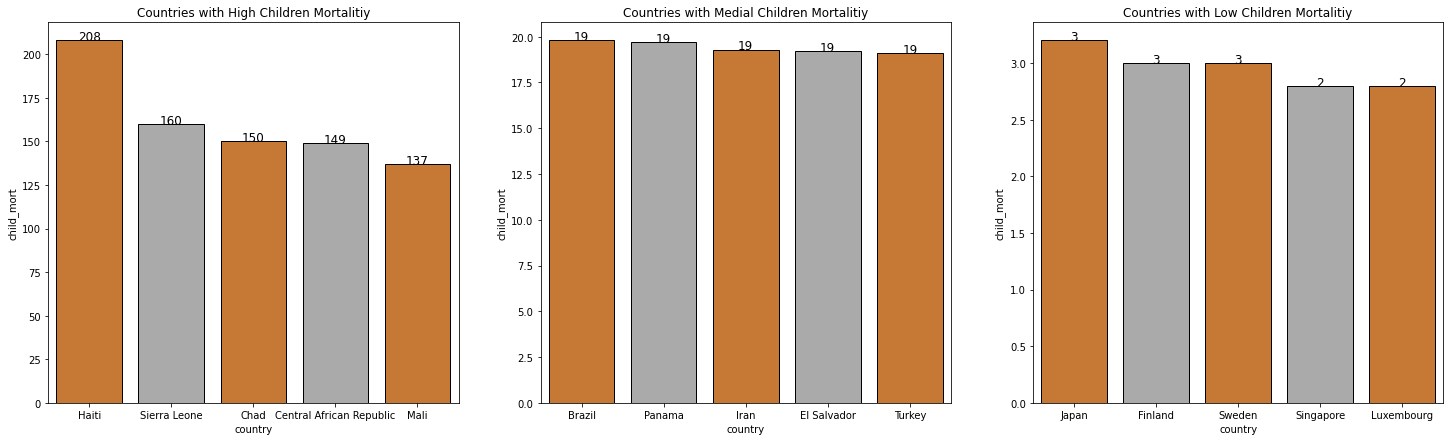

In [35]:
colors = ['#DD781D','#AAAAAA']
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

Copied this type of graphs from another notebook. Its interesting.

**What does this show?**

# Feature Correlation

Lets do a feature correlation matrix because its cool and sounds like a smart thing to do. 

<AxesSubplot:>

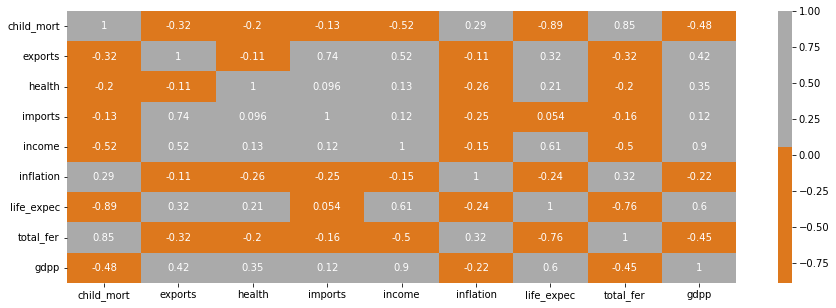

In [41]:
fig, ax = plt.subplots(nrows= 1, ncols= 1, figsize = (15, 5))
corr = data.corr()
sns.heatmap(corr, cmap = colors,annot = True,cbar = 'True')

**What are we seeing here?**



# Feature Scaling

**Why do we scale data?**

We scale the data because machine learning algorithms take input and processes them as just numbers, without context of the meaning of those numbers. Simply, it does not understand the meaning of that value. Additionally, the data can contain features in different units, ranges, and variance. These differences in features can cause issues for when it comes time to train our model. By scaling the data, the model is able to interpret these features on the same scale.